Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

 2 --building_windows_non_float_processed

 3 --vehicle_windows_float_processed

 4 --vehicle_windows_non_float_processed (none in this database)

 5 --containers

 6 --tableware

 7 --headlamps







In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [3]:
glass=pd.read_csv("glass.csv")
glass

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.duplicated().sum()

1

In [6]:
glass.drop_duplicates(inplace=True)

In [7]:
glass.duplicated().sum()

0

In [8]:
glass.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
glass.shape

(213, 10)

In [10]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


Normalizing data

In [11]:
from sklearn.preprocessing import scale

glass1=glass.iloc[:,:9]

In [12]:
# Converting into numpy array
glass2=glass1.values

In [13]:
# Normalizing the  data
glass_norm = scale(glass2)

Train test split

In [14]:
from sklearn.model_selection import train_test_split

x=glass_norm
y=glass['Type']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

KNN (K Neighrest Neighbour Classifier)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

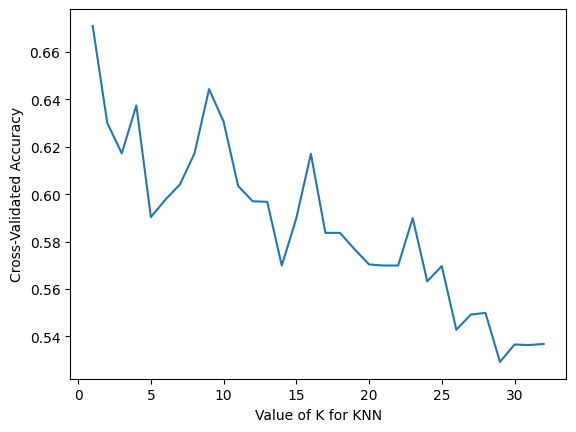

In [17]:
#Visualizing the CV results

k_range = range(1, 33)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(train_scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [18]:
model = KNeighborsClassifier(n_neighbors=2)

In [19]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
model.score(x_test, y_test)

0.671875

In [21]:
k_scores

[0.6710344827586207,
 0.6301149425287356,
 0.6172413793103448,
 0.6374712643678161,
 0.590344827586207,
 0.5977011494252873,
 0.6041379310344828,
 0.6172413793103448,
 0.6443678160919539,
 0.6305747126436783,
 0.603448275862069,
 0.5970114942528737,
 0.5967816091954024,
 0.5698850574712644,
 0.5898850574712644,
 0.6170114942528736,
 0.5836781609195402,
 0.5836781609195402,
 0.5767816091954022,
 0.5703448275862069,
 0.5698850574712644,
 0.5698850574712644,
 0.5898850574712643,
 0.5632183908045977,
 0.5696551724137932,
 0.5427586206896551,
 0.5491954022988506,
 0.5498850574712644,
 0.5291954022988505,
 0.5365517241379311,
 0.5363218390804597,
 0.5367816091954023]

In [22]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [24]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.6710344827586207
{'n_neighbors': 1}


Text(0, 0.5, 'Count')

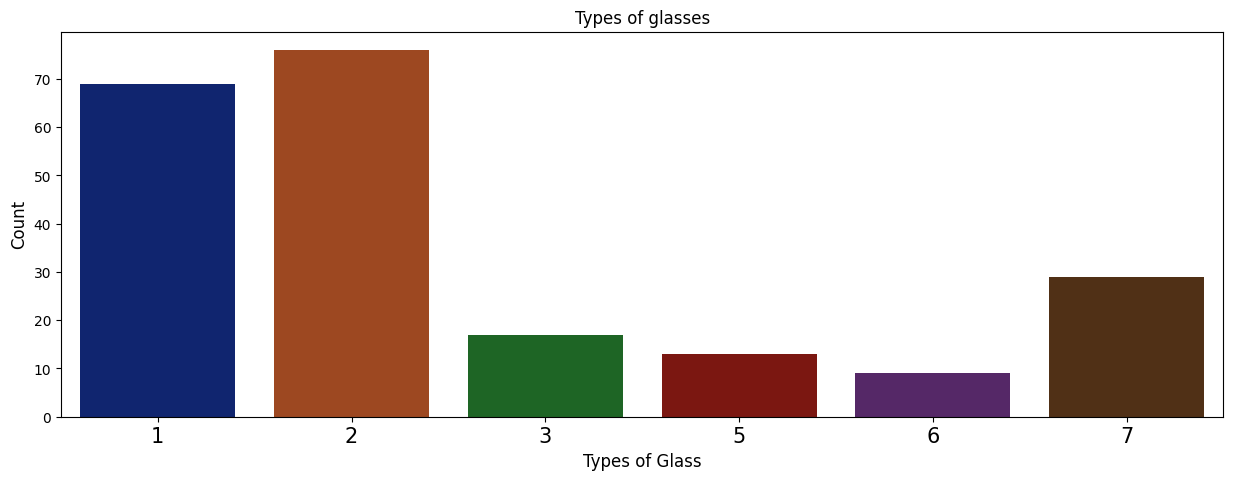

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.title("Types of glasses")
sns.countplot(data=glass, x="Type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Glass", fontsize=12)
plt.ylabel("Count", fontsize=12)

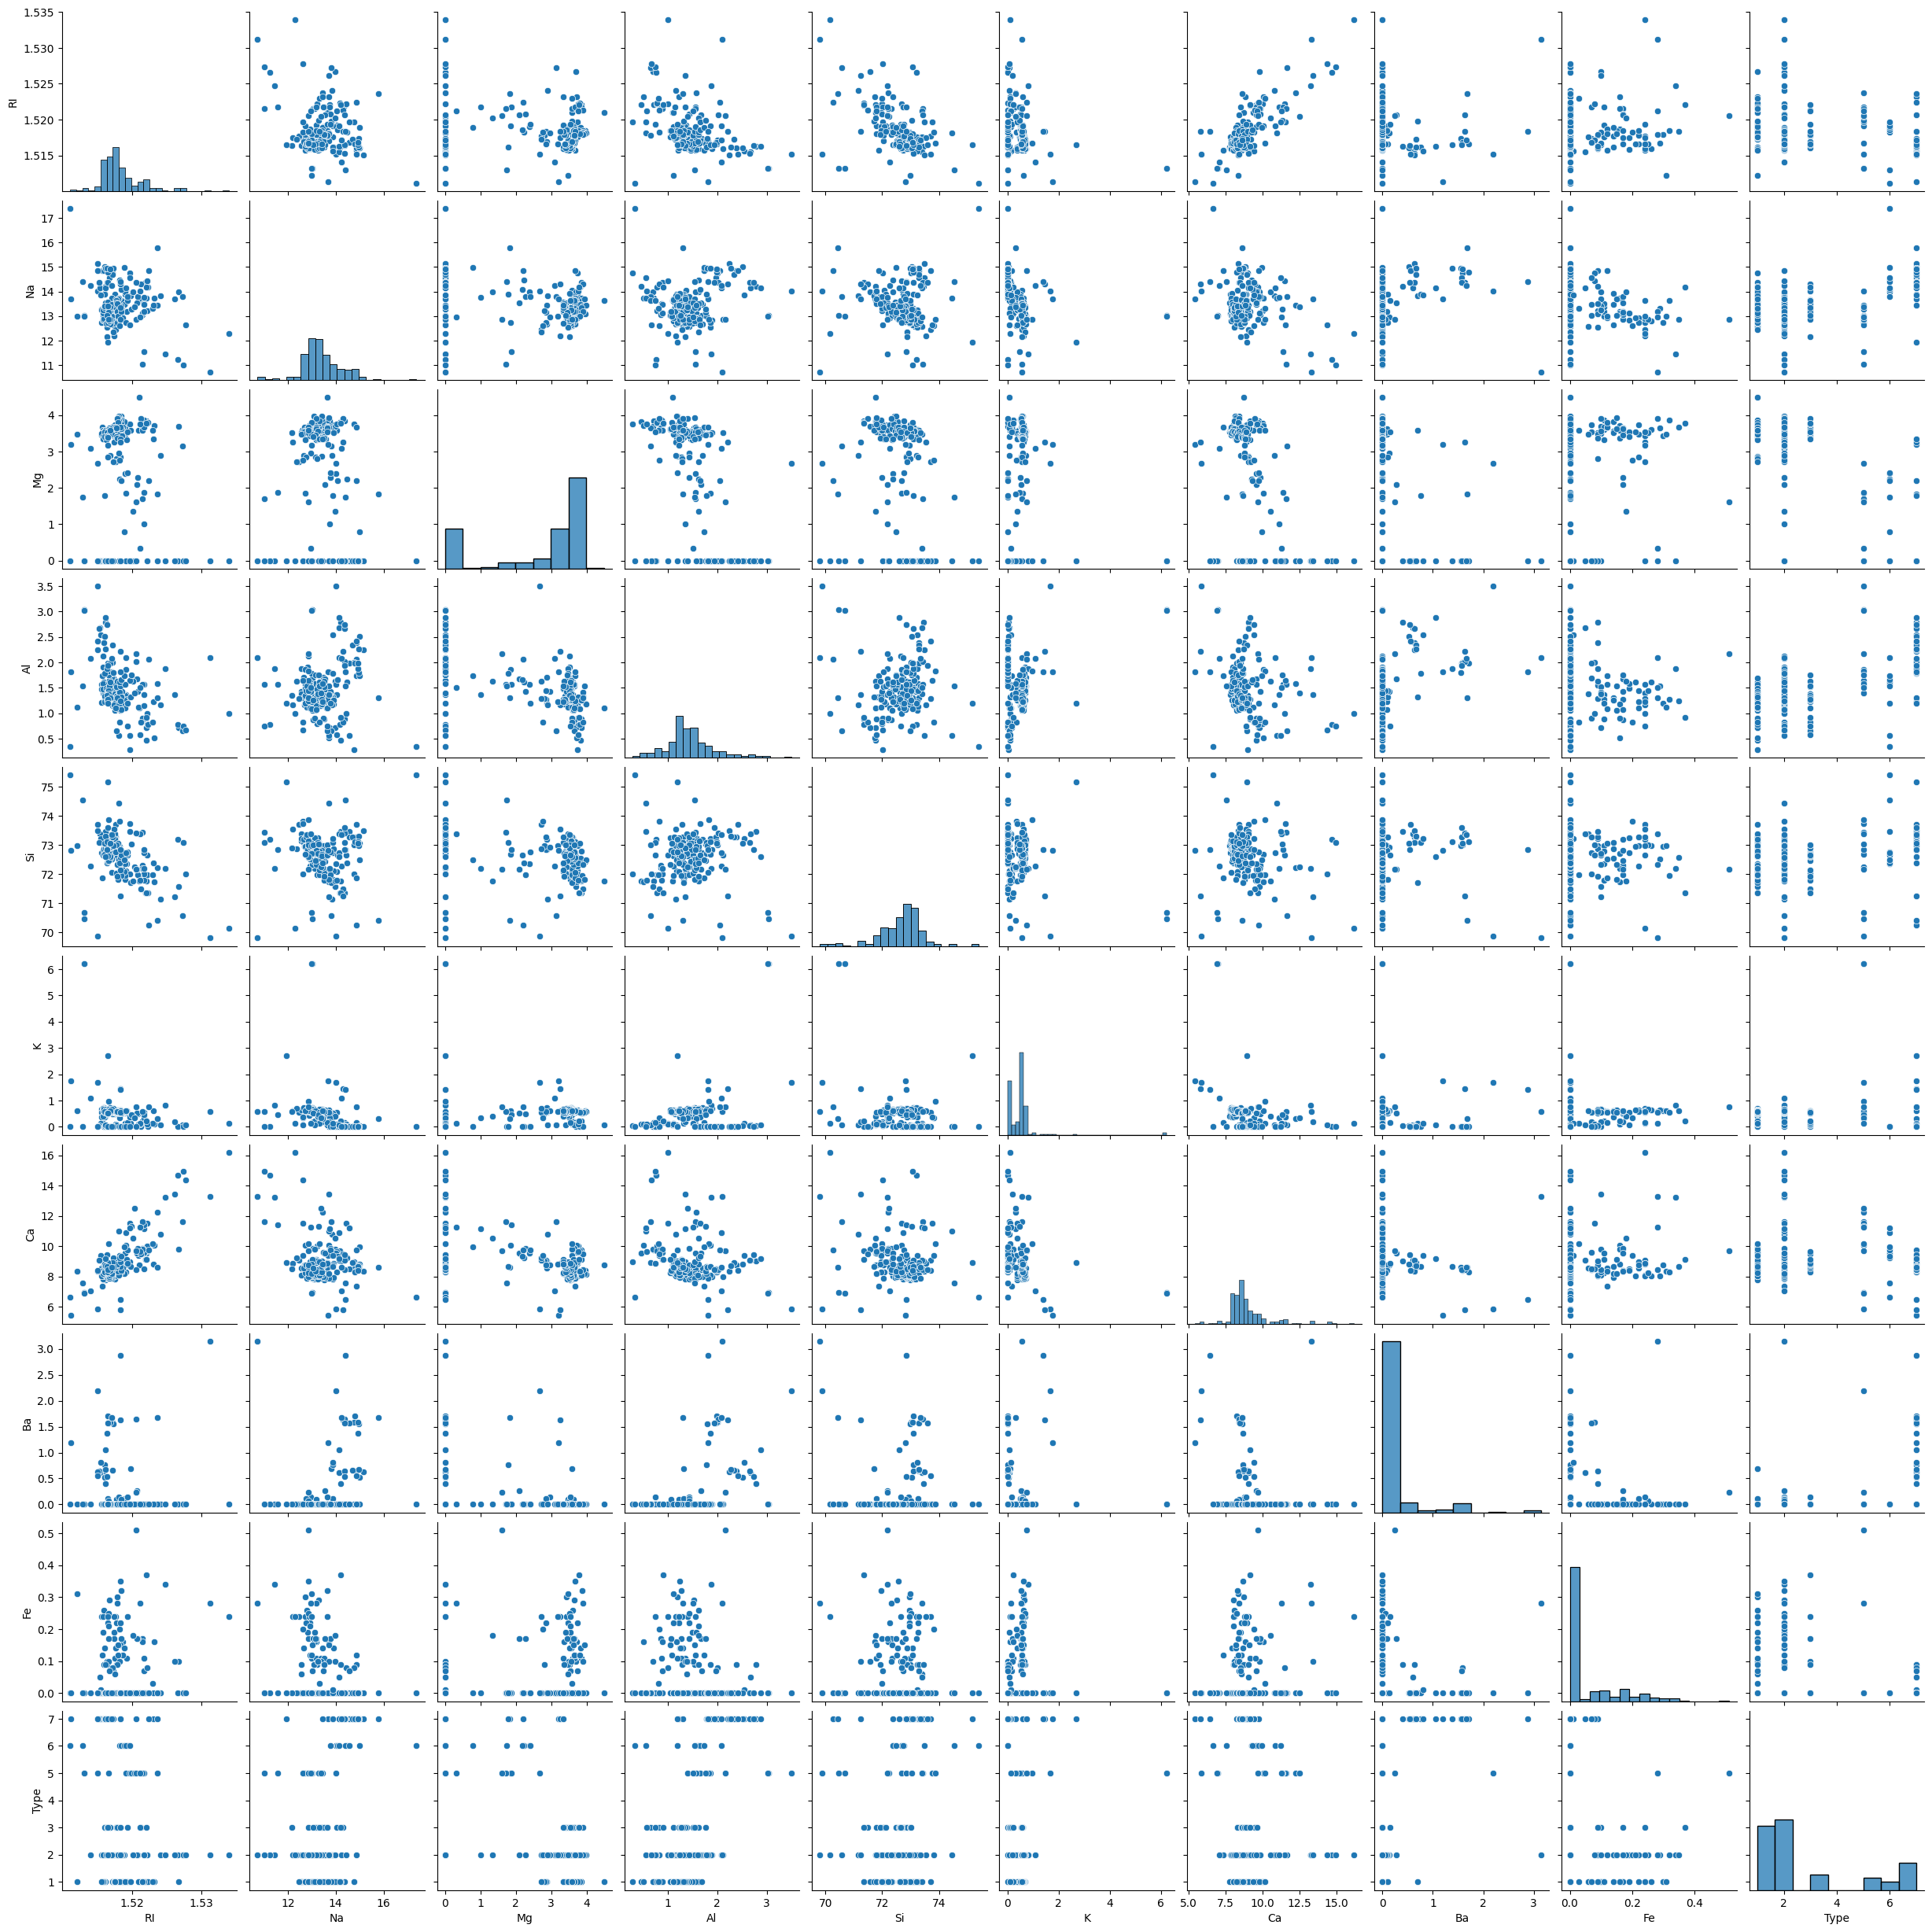

In [27]:
sns.pairplot(glass)